Лейкозные, здоровые и стволовые клетки объединены в один пул единичного объема. Если принять, что  
&nbsp;&nbsp;&nbsp;&nbsp;<b>us</b> - количество стволовых клеток, находящихся в нише,  
&nbsp;&nbsp;&nbsp;&nbsp;<b>uh</b> - здоровых,  
&nbsp;&nbsp;&nbsp;&nbsp;<b>ud</b> - лейкозных,  
&nbsp;&nbsp;&nbsp;&nbsp;<b>ua</b> - клеток микроокружения,

то их количество на момент начала кроветворения должно удовлетворять условию <b>uh + ud + us <= 1</b>. Распределение размножающихся стволовых клеток между больными и здоровыми происходит под влиянием клеток микроокружения ua в пропорциях <b>α : 1 - α (0 < α <=1)</b>. Здоровые, больные и стволовые клетки могут самостоятельно размножаться с удельными скоростями равными <b>μ1, μ2 и μ3</b> соответственно. Скорости перехода здоровых и больных клеток в кровеносное русло равны <b>ν1 и ν2</b> соответственно. Скорость перехода клеток <b>us</b> в здоровые и больные регулируется клетками микроокружения <b>ua</b>
.

$$
\frac{du_h}{dt} = \mu_1(1 - u_h - u_d - u_s)u_h + \alpha \gamma u_a u_s - \nu_1 u_h,
$$
$$
\frac{du_d}{dt} = \mu_2(1 - u_h - u_d - u_s)u_d + (1 - \alpha) \gamma u_a u_s - \nu_2 u_d,
$$
$$
\frac{du_s}{dt} = \mu_3(1 - u_h - u_d - u_s)u_s^2 - \gamma u_a u_s,
$$
$$
\frac{du_a}{dt} = -\mu_4 u_a (\beta - u_s).
$$


In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

In [2]:
# Определение функции системы уравнений
def system(t, y, mu1, mu2, mu3, mu4, alpha, beta, gamma, nu1, nu2):
    _uh, _ud, _us, _ua = y
    dudt = [
        mu1 * (1 - _uh - _ud - _us) * _uh + alpha * gamma * _ua * _us - nu1 * _uh,
        mu2 * (1 - _uh - _ud - _us) * _ud + (1 - alpha) * gamma * _ua * _us - nu2 * _ud,
        mu3 * (1 - _uh - _ud - _us) * _us ** 2 - gamma * _ua * _us,
        -mu4 * _ua * (beta - _us)
    ]
    return dudt

In [3]:
# Параметры
#params = {'mu1': 0.23905166557058694, 'mu2': 0.22574467432685197, 'mu3': 0.8194006160926074, 'mu4': 0.9250594000332057, 'alpha': 0.08654436420649289, 'beta': 0.21902488179504873, 'gamma': 0.3914863072987646, 'nu1': 0.09040117423981428, 'nu2': 0.09893054543063046}
params = {
    'mu1': 1, 'mu2': 1.5, 'mu3': 0.1, 'mu4': 0.1,
    'alpha': 0.2, 'beta': 0.35, 'gamma': 0.2,
    'nu1': 0.1, 'nu2': 0.1
}
# Начальные условия
uh, ud, us, ua = 0.55, 0.03, 0.1, 0.2
t_span = [0, 250]  # Временной интервал
intervals = np.linspace(t_span[0], t_span[1], 500)  # Интервалы для времени

In [4]:
# Решение системы уравнений
sol = solve_ivp(system, t_span, [uh, ud, us, ua], args=(params['mu1'], params['mu2'], params['mu3'], params['mu4'],
                                          params['alpha'], params['beta'], params['gamma'], params['nu1'], params['nu2']),
                method='RK45', t_eval=intervals)

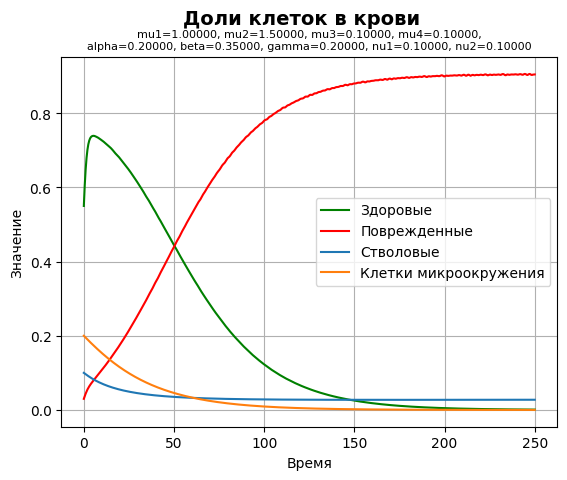

In [154]:
%matplotlib inline
# Визуализация результатов
plt.figure()
plt.suptitle('Доли клеток в крови', fontsize=14, fontweight='bold')
plt.plot(sol.t, sol.y[0], label='Здоровые', color='green')
plt.plot(sol.t, sol.y[1], label='Поврежденные', color='red')
plt.plot(sol.t, sol.y[2], label='Стволовые')
plt.plot(sol.t, sol.y[3], label='Клетки микроокружения')
plt.grid()
plt.title("mu1={:.5f}, mu2={:.5f}, mu3={:.5f}, mu4={:.5f},\nalpha={:.5f}, beta={:.5f}, gamma={:.5f}, nu1={:.5f}, nu2={:.5f}".format(
    params['mu1'], params['mu2'], params['mu3'], params['mu4'], params['alpha'], params['beta'], params['gamma'], params['nu1'], params['nu2']), fontsize=8)
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.savefig('leikimia.png')
plt.show()

In [5]:
for i in range(sol.y[0].shape[0]):
    if sol.y[0][i] + sol.y[1][i] + sol.y[2][i] + sol.y[3][i] > 1:
        print(f"Ошибка на шаге {i}: {sol.y[0][i] + sol.y[1][i] + sol.y[2][i] + sol.y[3][i]}")

Ошибка на шаге 3: 1.015976064124249
Ошибка на шаге 4: 1.0393253337468022
Ошибка на шаге 5: 1.054899554893435
Ошибка на шаге 6: 1.0646827360039708
Ошибка на шаге 7: 1.0706936062206198
Ошибка на шаге 8: 1.073961432401369
Ошибка на шаге 9: 1.0752613515249836
Ошибка на шаге 10: 1.0754645653484796
Ошибка на шаге 11: 1.074965285576781
Ошибка на шаге 12: 1.0737969957457072
Ошибка на шаге 13: 1.0721594966531285
Ошибка на шаге 14: 1.0704260184741348
Ошибка на шаге 15: 1.0687068439859804
Ошибка на шаге 16: 1.0668691166757562
Ошибка на шаге 17: 1.06489019687245
Ошибка на шаге 18: 1.0628238209204153
Ошибка на шаге 19: 1.060800101179372
Ошибка на шаге 20: 1.0589197662860155
Ошибка на шаге 21: 1.0570726604023346
Ошибка на шаге 22: 1.0551875784728024
Ошибка на шаге 23: 1.0532349663062799
Ошибка на шаге 24: 1.051226500307475
Ошибка на шаге 25: 1.0492150874769424
Ошибка на шаге 26: 1.0472948654110834
Ошибка на шаге 27: 1.0456217661410863
Ошибка на шаге 28: 1.0441841010035342
Ошибка на шаге 29: 1.042736

В большинстве случаев эта система казалась корректной, но обнаружилась что при некоторых значениях параметров значения становятся более 1 или отрицательными, что не соответствует реальности. Поэтому необходимо ввести ограничения на значения переменных при рассчета dudt.

### пример плохой системы
params = {'mu1': 0.23905166557058694, 'mu2': 0.22574467432685197, 'mu3': 0.8194006160926074, 'mu4': 0.9250594000332057, 'alpha': 0.08654436420649289, 'beta': 0.21902488179504873, 'gamma': 0.3914863072987646, 'nu1': 0.09040117423981428, 'nu2': 0.09893054543063046}

![bad_system](bad_system_leikimia.png)

In [6]:
def system(t, y, mu1, mu2, mu3, mu4, alpha, beta, gamma, nu1, nu2):
    _uh, _ud, _us, _ua = y
    total = _uh + _ud + _us + _ua

    # Нормализуем, если общая сумма превышает 1
    if total > 1:
        _uh, _ud, _us, _ua = _uh / total, _ud / total, _us / total, _ua / total

    dudt = [
        mu1 * (1 - _uh - _ud - _us) * _uh + alpha * gamma * _ua * _us - nu1 * _uh,
        mu2 * (1 - _uh - _ud - _us) * _ud + (1 - alpha) * gamma * _ua * _us - nu2 * _ud,
        mu3 * (1 - _uh - _ud - _us) * _us ** 2 - gamma * _ua * _us,
        -mu4 * _ua * (beta - _us)
    ]

    # Дополнительная нормализация производных, если это необходимо
    dudt_total = sum(dudt)
    if dudt_total + total > 1:
        dudt = [x * (1 - total) / dudt_total for x in dudt]

    return dudt

Первым вариантом было попробовать вводить нормализацию но это приводило к тому что в какой то момент система стабилизировалась и не менялась. Это поведение наблюдалась при любых параметрах и интуитивно не казалось корректным. Поэтому было принято решение ввести ограничения на значения переменных при рассчета dudt.

![bad_system2](bad_system_leikimia2.png)

In [8]:
# Определение функции системы уравнений
def system(t, y, mu1, mu2, mu3, mu4, alpha, beta, gamma, nu1, nu2):
    _uh, _ud, _us, _ua = y
    
    dudt = [
        mu1 * (1 - _uh - _ud - _us) * _uh + alpha * gamma * _ua * _us - nu1 * _uh,
        mu2 * (1 - _uh - _ud - _us) * _ud + (1 - alpha) * gamma * _ua * _us - nu2 * _ud,
        mu3 * (1 - _uh - _ud - _us) * _us ** 2 - gamma * _ua * _us,
        -mu4 * _ua * (beta - _us)
    ]
    # Ограничение значений чтобы не было отрицательных значений
    if _uh + dudt[0] < 0:
        dudt[0] = -_uh
    if _ud + dudt[1] < 0:
        dudt[1] = -_ud
    if _us + dudt[2] < 0:
        dudt[2] = -_us
    if _ua + dudt[3] < 0:
        dudt[3] = -_ua
    # Ограничение значений чтобы не было значений больше 1        
    if _uh + dudt[0] > 1:
        dudt[0] = 1 - _uh
    if _ud + dudt[1] > 1:
        dudt[1] = 1 - _ud
    if _us + dudt[2] > 1:
        dudt[2] = 1 - _us
    if _ua + dudt[3] > 1:
        dudt[3] = 1 - _ua
    return dudt

### пример исправленной системы
Те же парметры и масштабы, но теперь значения не выходят за рамки

![good_system](good_system_leikimia.png)

Убрали масштабирование по оси Y

![good_system2](good_system_leikimia2.png)



### Тут будет интерактивный график в котором можно изменять параметры и начальные условия
### Для взаимодействия с графиком необходимо запустить ячейку
Параметры:
- uh0 - начальное значение здоровых клеток
- ud0 - начальное значение больных клеток
- us0 - начальное значение стволовых клеток
- ua0 - начальное значение клеток микроокружения
- mu1 - скорость размножения здоровых клеток
- mu2 - скорость размножения больных клеток
- mu3 - скорость размножения стволовых клеток
- mu4 - скорость перехода клеток микроокружения
- alpha - доля стволовых клеток, переходящих в здоровые
- beta - доля стволовых клеток, переходящих в больные
- gamma - влияние клеток микроокружения на стволовые клетки
- nu1 - скорость перехода здоровых клеток в кровеносное русло
- nu2 - скорость перехода больных клеток в кровеносное русло

In [9]:
%matplotlib notebook
# Инициализация фигуры и осей
fig, ax = plt.subplots(figsize=(10, 5))
lines = {
    'uh': ax.plot([], [], label='uh', color='green')[0],
    'ud': ax.plot([], [], label='ud', color='red')[0],
    'us': ax.plot([], [], label='us')[0],
    'ua': ax.plot([], [], label='ua')[0]
}
ax.set_xlabel('Time')
ax.set_ylabel('Variables')
ax.legend()
ax.grid(True)

# Функция для решения и отображения
def solve_and_plot(uh0, ud0, us0, ua0, mu1, mu2, mu3, mu4, alpha, beta, gamma, nu1, nu2):
    _sol = solve_ivp(system, t_span, [uh0, ud0, us0, ua0], args=(mu1, mu2, mu3, mu4, alpha, beta, gamma, nu1, nu2),
                     method='RK45', t_eval=intervals)
    for var, line in lines.items():
        line.set_data(_sol.t, _sol.y[list(lines.keys()).index(var)])
    ax.relim()
    ax.autoscale_view()
    ax.set_ylim([np.min(_sol.y), np.max(_sol.y)*1.1])
    fig.canvas.draw_idle()  # Принудительное обновление канваса

# Интерактивные элементы
interact(solve_and_plot,
        uh0=FloatSlider(min=0, max=1, step=0.01, value=uh),
        ud0=FloatSlider(min=0, max=1, step=0.01, value=ud),
        us0=FloatSlider(min=0, max=1, step=0.01, value=us),
        ua0=FloatSlider(min=0, max=1, step=0.01, value=ua),
        mu1=FloatSlider(min=0, max=3, step=0.01, value=params['mu1']),
        mu2=FloatSlider(min=0, max=3, step=0.01, value=params['mu2']),
        mu3=FloatSlider(min=0, max=3, step=0.01, value=params['mu3']),
        mu4=FloatSlider(min=0, max=3, step=0.01, value=params['mu4']),
        alpha=FloatSlider(min=0, max=1, step=0.01, value=params['alpha']),
        beta=FloatSlider(min=0, max=1, step=0.01, value=params['beta']),
        gamma=FloatSlider(min=0, max=1, step=0.01, value=params['gamma']),
        nu1=FloatSlider(min=0, max=0.1, step=0.001, value=params['nu1']),
        nu2=FloatSlider(min=0, max=0.1, step=0.001, value=params['nu2']))

<IPython.core.display.Javascript object>

interactive(children=(FloatSlider(value=0.55, description='uh0', max=1.0, step=0.01), FloatSlider(value=0.03, …

<function __main__.solve_and_plot(uh0, ud0, us0, ua0, mu1, mu2, mu3, mu4, alpha, beta, gamma, nu1, nu2)>

Ссылка чтоб потыкать интерактивность блока выше (для работы необходимо активировать все блоки над ним) https://mybinder.org/v2/gh/SergeevSergey99/Math_model/HEAD?filepath=%D0%9C%D0%B0%D0%B3%D0%B8%D1%81%D1%82%D1%80%D0%B0%D1%82%D1%83%D1%80%D0%B0%2F%D0%A1%D0%B5%D0%BC4%2F%D0%94%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC%2Fleikimia_test.ipynb

# Анализ чувствительности

In [158]:
from SALib.analyze import sobol
from SALib.sample.sobol import sample
import pandas as pd
from SALib.test_functions import Ishigami

In [159]:
# Определение модели
def model(params):
    sol = solve_ivp(system, t_span, [uh, ud, us, ua], args=(params['mu1'], params['mu2'], params['mu3'], params['mu4'],
                                          params['alpha'], params['beta'], params['gamma'], params['nu1'], params['nu2']),
                method='RK45', t_eval=intervals)

    if not sol.success:
        print(f"Integration failed: {sol.message}")
        print(f"Problematic params: {params}")
    return sol.y

In [160]:
# Определение диапазона параметров
problem = {
    'num_vars': 9,  # количество параметров
    'names': ['mu1', 'mu2', 'mu3', 'mu4', 'alpha', 'beta', 'gamma', 'nu1', 'nu2'],  # имена параметров
    'bounds': [[0.01, 1.5], [0.01, 1.5], [0.01, 1.5], [0.01, 1.5], 
               [0.01, 1.0], [0.01, 1.0], [0.01, 1.0], 
               [0.01, 0.1], [0.01, 0.1]]  # границы для каждого параметра
}

In [161]:
# Генерация выборок
param_values = sample(problem, 1024)

In [162]:
Y = np.array([np.array(model(dict(zip(problem['names'], params)))) for params in param_values])

In [200]:
# Разделение массива на подмассивы
YH, YD, YS, YA = np.split(Y, 4, axis=1)
YH.shape, YD.shape, YS.shape, YA.shape

((20480, 1, 500), (20480, 1, 500), (20480, 1, 500), (20480, 1, 500))

In [201]:
YH = YH.reshape(-1, 500)
YD = YD.reshape(-1, 500)
YS = YS.reshape(-1, 500)
YA = YA.reshape(-1, 500)
YH.shape, YD.shape, YS.shape, YA.shape

((20480, 500), (20480, 500), (20480, 500), (20480, 500))

### S1: первый порядок индексов, указывающих влияние каждого параметра изолированно.
### ST: общий индекс, указывающий общее влияние параметра, включая взаимодействие с другими параметрами.

In [203]:
from tqdm import tqdm

In [204]:
SIH = []
SiD = []
SiS = []
SiA = []
for i in tqdm(range(500)):
    SIH.append(sobol.analyze(problem, YH[:, i]))
    SiD.append(sobol.analyze(problem, YD[:, i]))
    SiS.append(sobol.analyze(problem, YS[:, i]))
    SiA.append(sobol.analyze(problem, YA[:, i]))

  0%|          | 0/500 [00:00<?, ?it/s]C:\Users\Сергей\Math_model\venv\lib\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
C:\Users\Сергей\Math_model\venv\lib\site-packages\SALib\analyze\sobol.py:216: UserWarning: Constant values encountered, indicating model evaluations (or subset of evaluations) produced identical values.
  warn(CONST_RESULT_MSG)
C:\Users\Сергей\Math_model\venv\lib\site-packages\SALib\analyze\sobol.py:229: UserWarning: Constant values encountered, indicating model evaluations (or subset of evaluations) produced identical values.
  warn(CONST_RESULT_MSG)
C:\Users\Сергей\Math_model\venv\lib\site-packages\SALib\analyze\sobol.py:239: UserWarning: Constant values encountered, indicating model evaluations (or subset of evaluations) produced identical values.
  warn(CONST_RESULT_MSG)
C:\Users\Сергей\

In [206]:
SIH1 = np.array([si['S1'] for si in SIH])
SID1 = np.array([si['S1'] for si in SiD])
SIS1 = np.array([si['S1'] for si in SiS])
SIA1 = np.array([si['S1'] for si in SiA])

SIHT = np.array([si['ST'] for si in SIH])
SIDT = np.array([si['ST'] for si in SiD])
SIST = np.array([si['ST'] for si in SiS])
SIAT = np.array([si['ST'] for si in SiA])


In [325]:
def pltS1ST(i):
    %matplotlib inline
    plt.figure()
    plt.suptitle('Чувствительность параметра ' + problem['names'][i] + ' S1', fontsize=14, fontweight='bold')
    plt.plot(SIH1[:, i], label='S1 Здоровые', color='#33FF33')
    plt.plot(SID1[:, i], label='S1 Поврежденные', color='#FF0000')
    plt.plot(SIS1[:, i], label='S1 Стволовые', color='#0000FF')
    plt.plot(SIA1[:, i], label='S1 Клетки микроокружения', color='#FF00FF')
    
    plt.xlabel('Время')
    plt.ylabel('Значение S1')
    plt.legend()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.ylim(0, 1)
    plt.savefig(str(i) + 'Чувствительность параметра ' + problem['names'][i] + ' S1.png', bbox_inches='tight')
    plt.show()
    
    plt.figure()
    plt.suptitle('Чувствительность параметра ' + problem['names'][i] + ' ST', fontsize=14, fontweight='bold')
    plt.plot(SIHT[:, i], label='ST Здоровые', color='#009900')
    plt.plot(SIDT[:, i], label='ST Поврежденные', color='#990000')
    plt.plot(SIST[:, i], label='ST Стволовые', color='#000099')
    plt.plot(SIAT[:, i], label='ST Клетки микроокружения', color='#110011')
    
    plt.xlabel('Время')
    plt.ylabel('Значение ST')
    plt.legend()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.ylim(0, 1)
    plt.savefig(str(i) + 'Чувствительность параметра ' + problem['names'][i] + ' ST.png', bbox_inches='tight')
    plt.show()

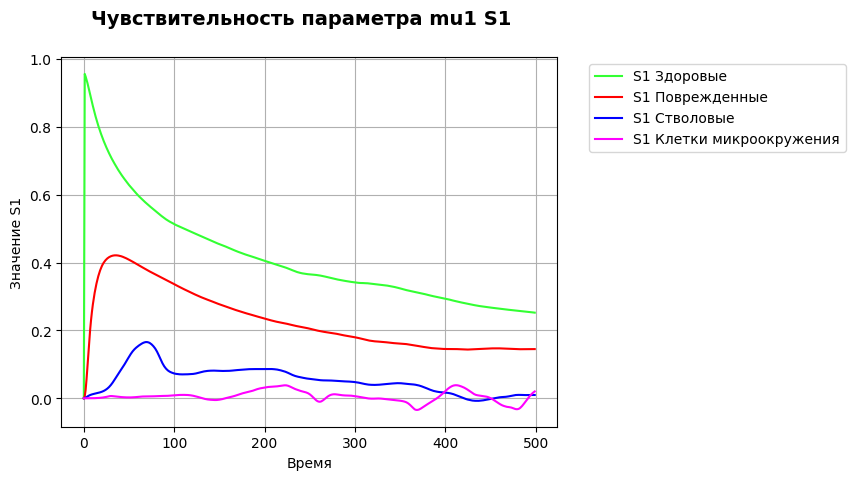

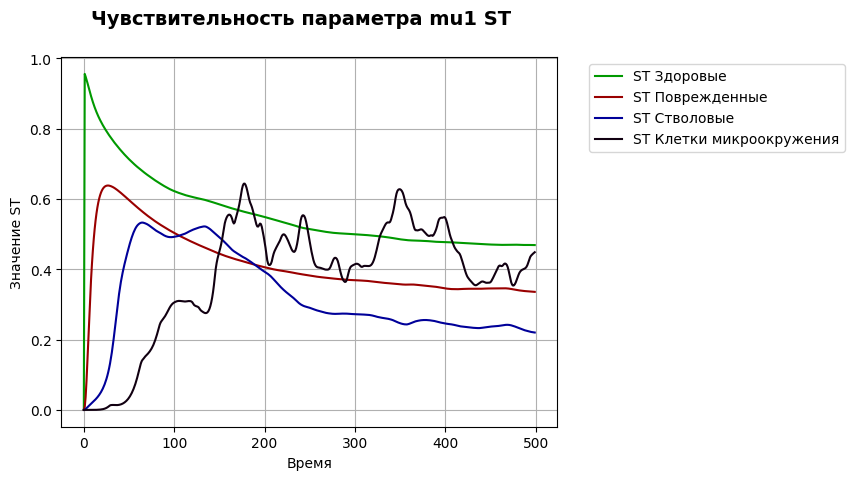

In [326]:
pltS1ST(0)

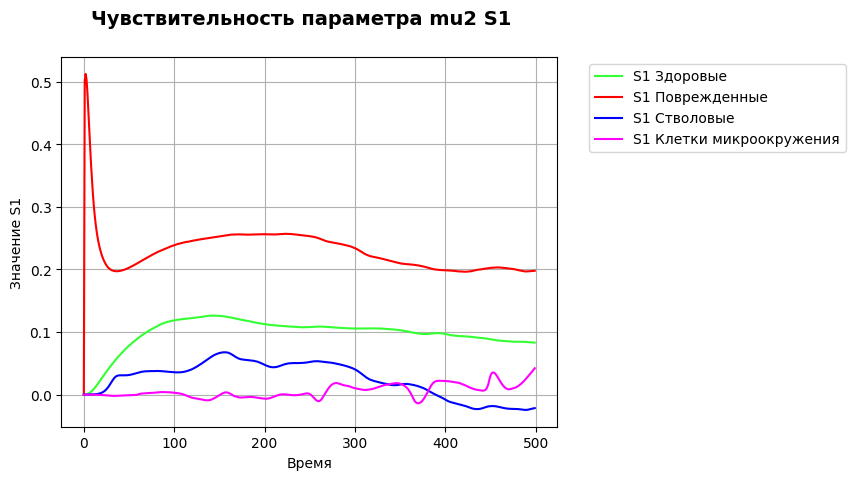

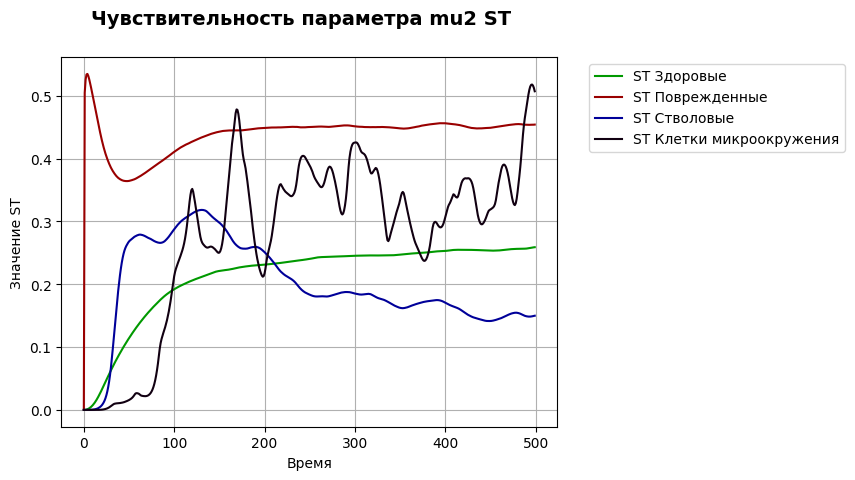

In [327]:
pltS1ST(1)

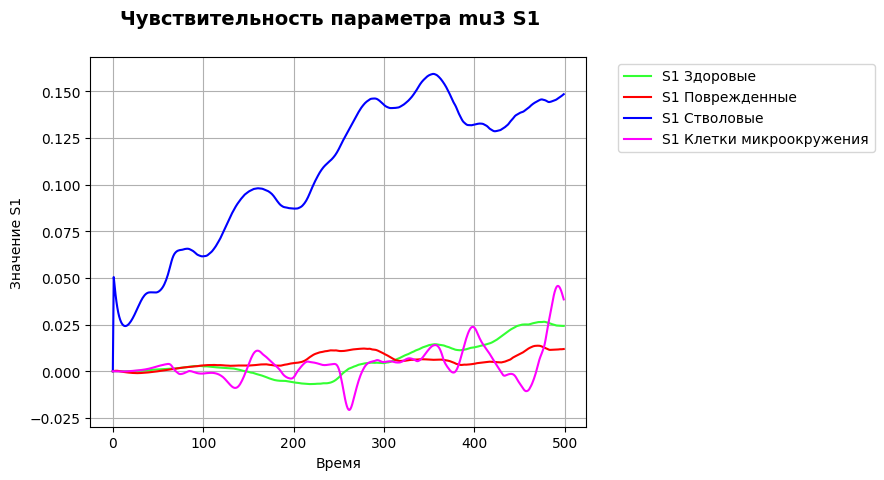

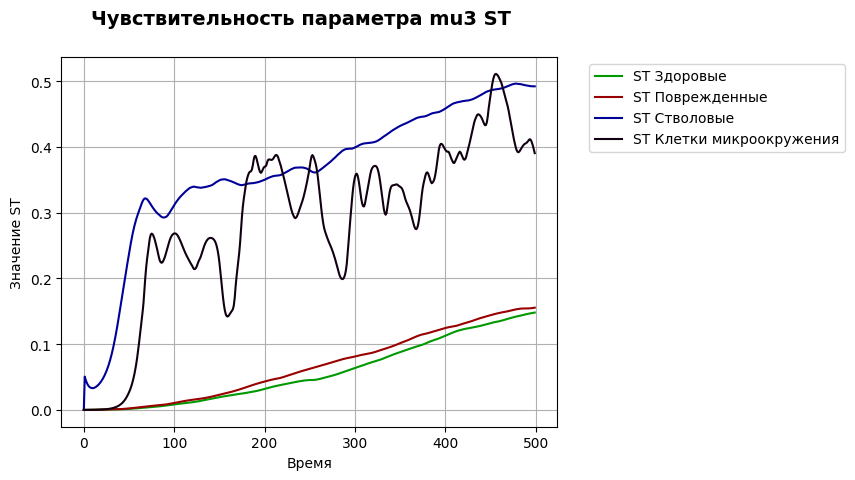

In [328]:
pltS1ST(2)

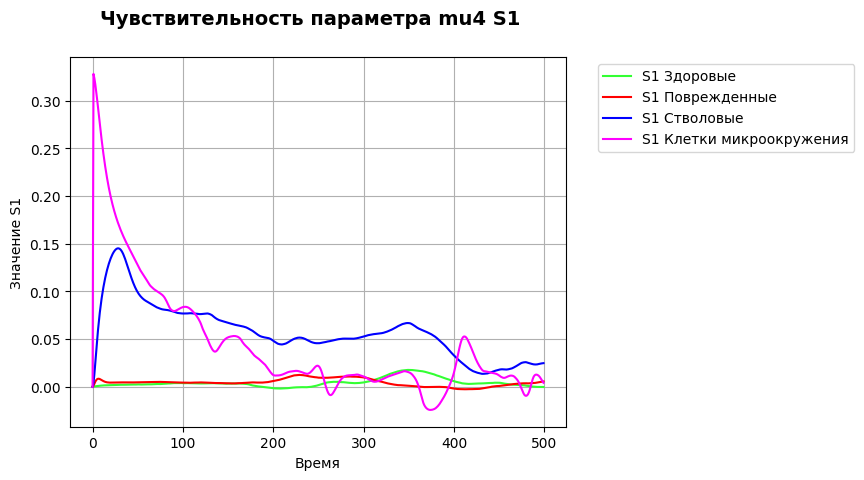

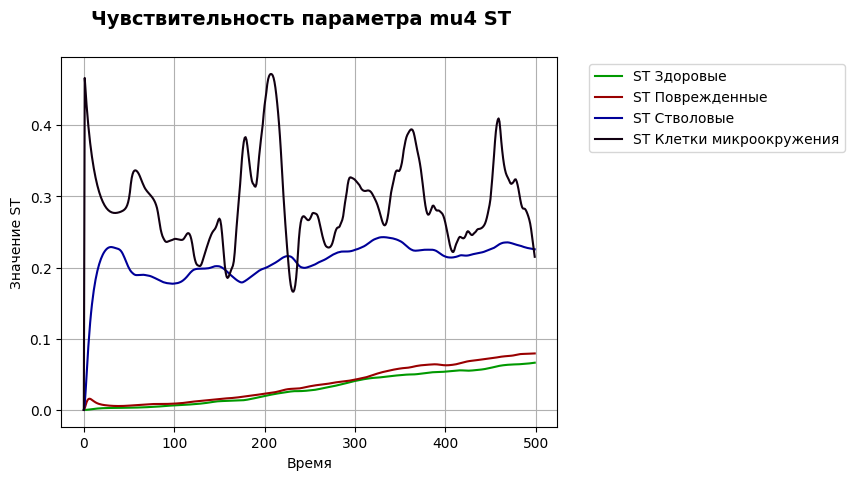

In [329]:
pltS1ST(3)

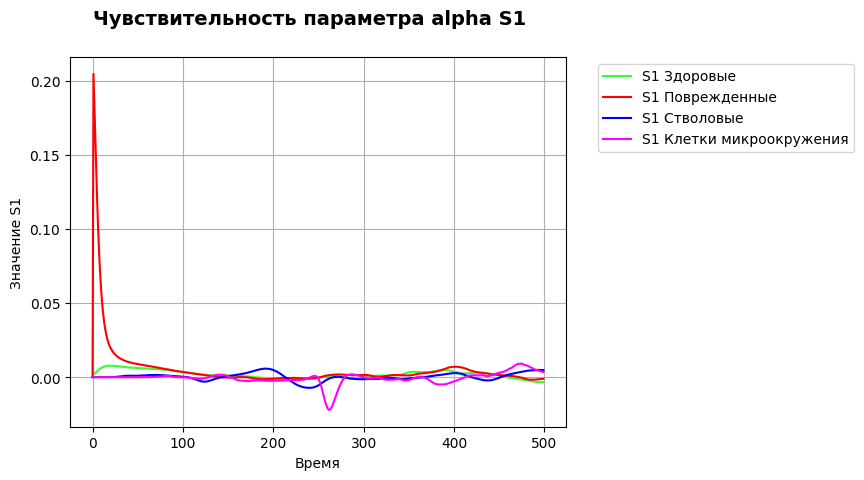

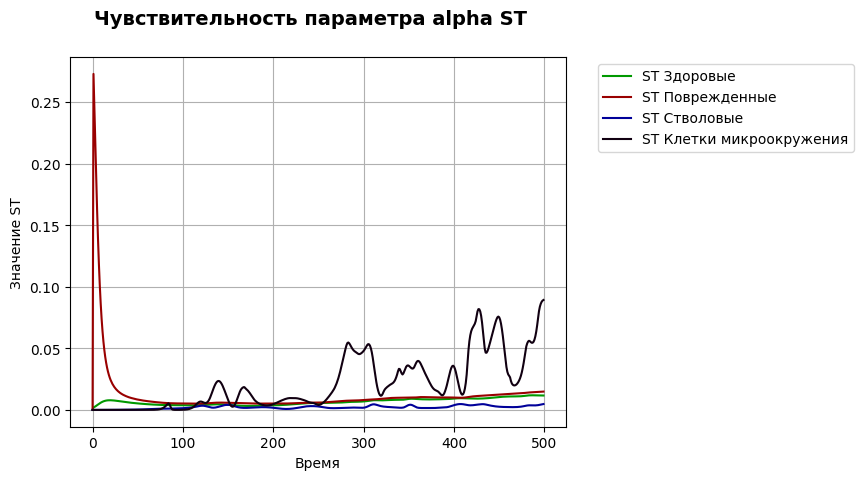

In [330]:
pltS1ST(4)

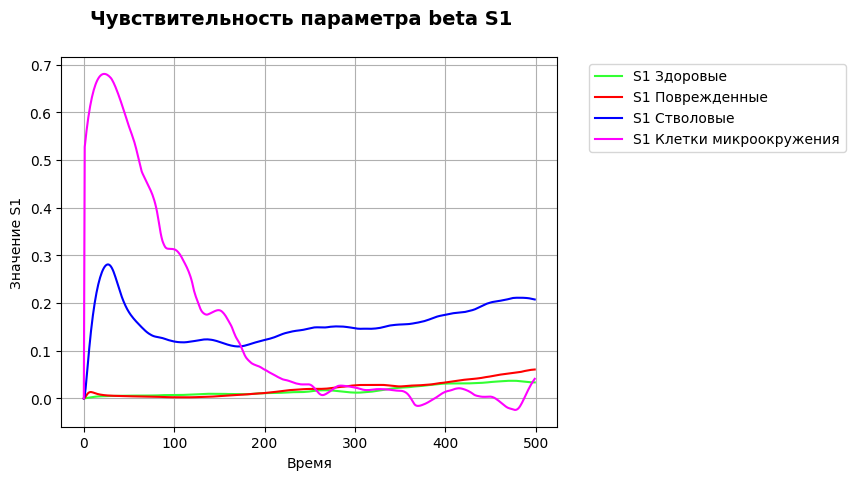

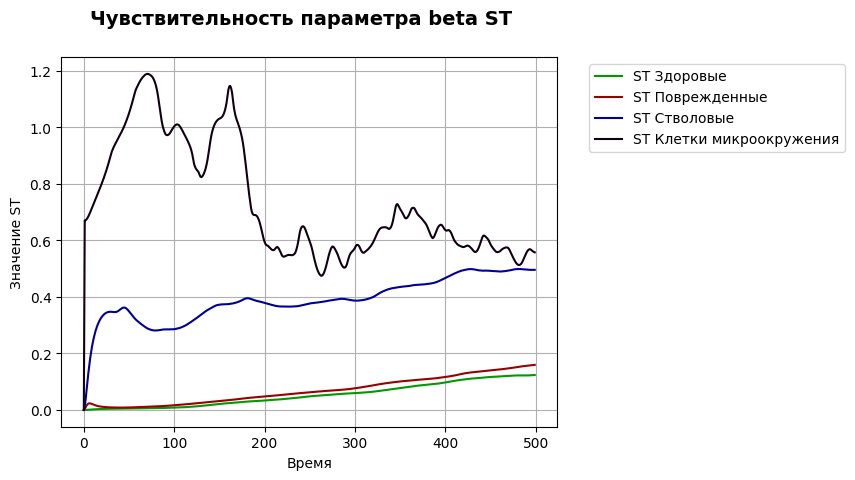

In [331]:
pltS1ST(5)

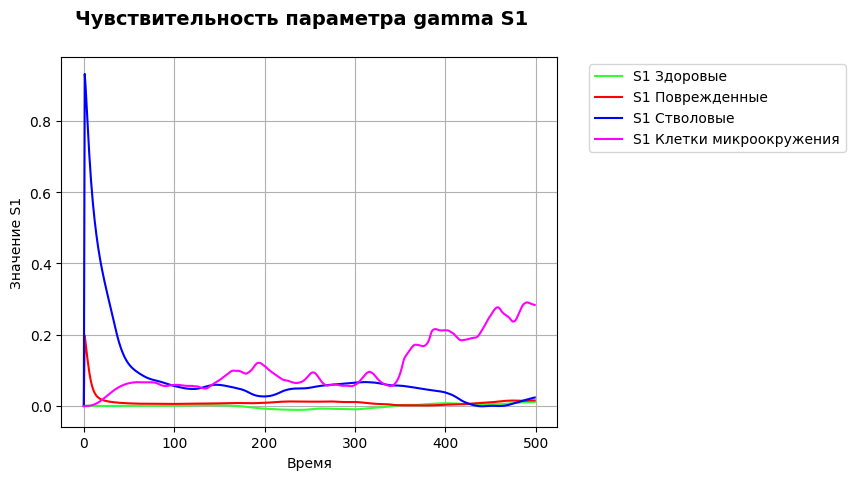

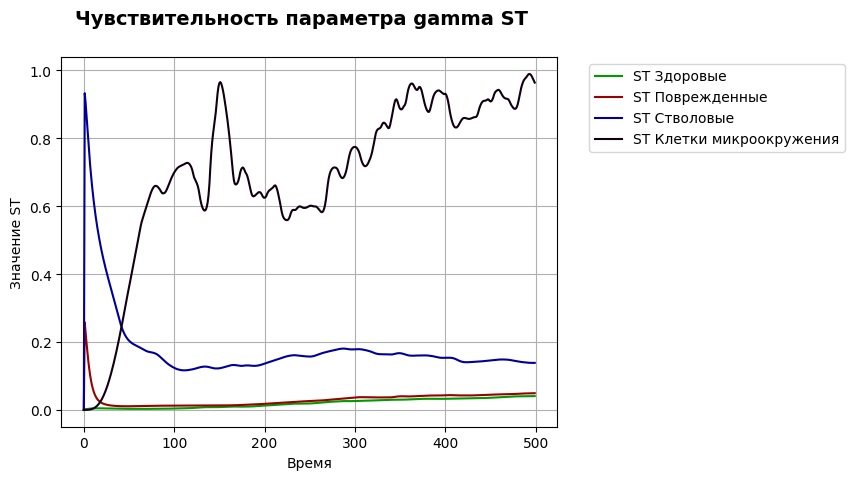

In [332]:
pltS1ST(6)

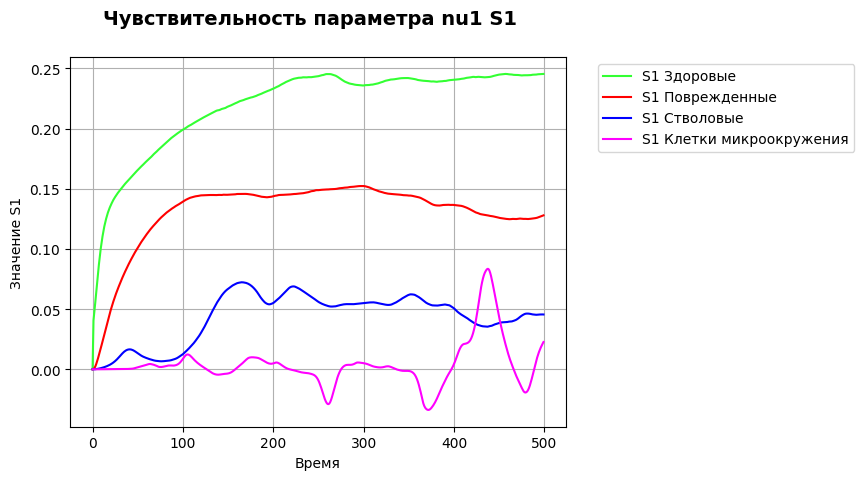

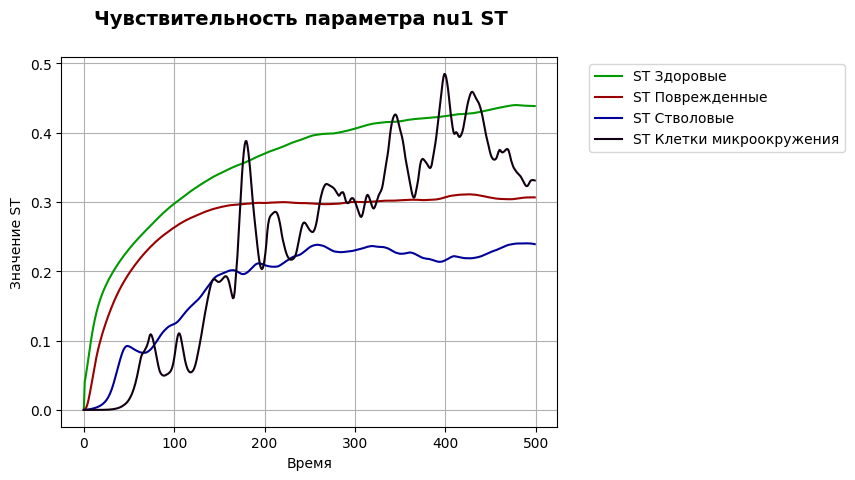

In [333]:
pltS1ST(7)

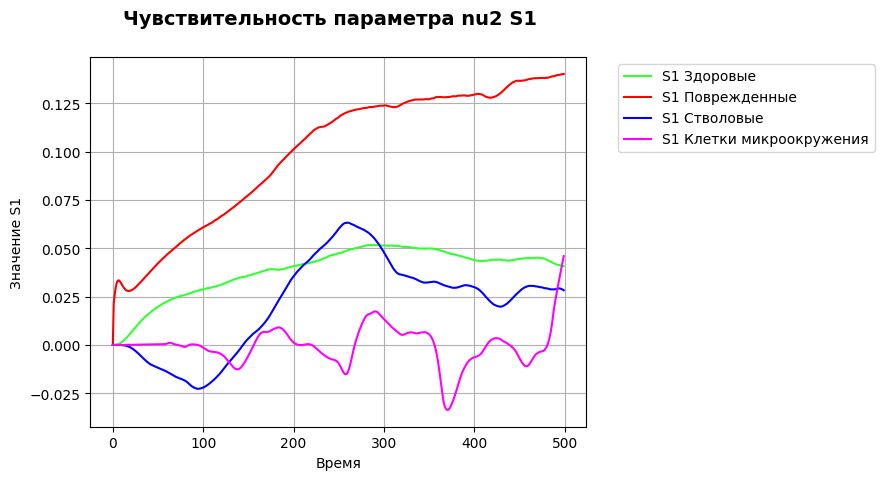

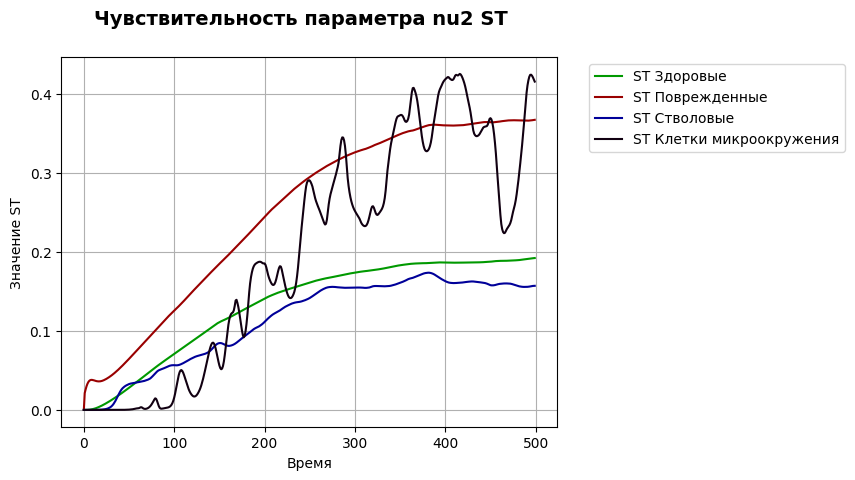

In [334]:
pltS1ST(8)

In [ ]:
# Определяем функцию для стилизации
def color_cells(val):
    color = 'yellow' if val > 0.4 else 'green' if val > 0.2 else 'white'
    return f'color: {color}'
def df_SI1T(S1, ST):
    data = [[S1[-1,i] for i in range(len(problem['names']))], [ST[-1,i] for i in range(len(problem['names']))]]
    df = pd.DataFrame(data=data, columns=problem['names'], index=['S1', 'ST'])
    return df.style.map(color_cells)

In [323]:
df_SI1T(SIH1, SIHT)

,mu1,mu2,mu3,mu4,alpha,beta,gamma,nu1,nu2
S1,0.252249,0.083030,0.024303,-0.000236,-0.003406,0.033646,0.011378,0.245385,0.040737
ST,0.469090,0.259052,0.148136,0.066304,0.011698,0.123537,0.040716,0.438377,0.192185


In [324]:
df_SI1T(SID1, SIDT)

,mu1,mu2,mu3,mu4,alpha,beta,gamma,nu1,nu2
S1,0.144905,0.197822,0.011912,0.005535,-0.001158,0.060683,0.015807,0.127895,0.140159
ST,0.335939,0.454280,0.155552,0.079317,0.014885,0.159394,0.049248,0.306601,0.367065


In [292]:
df_SI1T(SIS1, SIST)

,mu1,mu2,mu3,mu4,alpha,beta,gamma,nu1,nu2
S1,0.009644,-0.021569,0.148522,0.024761,0.004765,0.207570,0.023948,0.045540,0.028252
ST,0.220245,0.149971,0.492243,0.225514,0.004770,0.495499,0.138609,0.239150,0.157028


In [293]:
df_SI1T(SIA1, SIAT)

,mu1,mu2,mu3,mu4,alpha,beta,gamma,nu1,nu2
S1,0.020083,0.042095,0.038517,0.004168,0.003435,0.041116,0.283487,0.022657,0.045937
ST,0.448768,0.507342,0.390597,0.215019,0.089251,0.557355,0.964284,0.331026,0.415446


## Сценарный анализ